# Visualizing Data

In this lesson, we will learn about how we can use Python to visualize large datasets through histograms, scatter plots, and pie charts.

In [3]:
# First, we import the libraries we will use in this notebook and load the Fragile Families data. 
# The first line sets maplotlib plots to show up inside the notebook.
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

# Directory with cleaned data
output_dir = "../output"

# Load data
bg = pd.read_csv(output_dir+'/background.csv', index_col=0) # for now we load all the data

## Visualizing Continuous Variables

### Histograms

In this cell we will learn how to plot histograms. Histograms are diagrams consisting of rectangles (bins) whose height 
is proportional to the frequency of a variable  (i.e., number of times the variable appears in the data) and whose 
width is equal to the class interval (i.e., the range of values that fall within the bin).
Here, we will plot two histograms. The first histogram will be for the age of the mother when the child was born and the
second histogram will be for the age of the father when the child was born.

Try and use the Fragile Families feature lookup website to find the name of the features that contains the mother's and father's age when the child was born. You snould find that the feature names are cm1age and cf1age.

Oldest father: 51.0; Youngest father: 16.0; Fathers Age Range: 35.0
Oldest mother: 43.0; Youngest mother: 15.0; Mothers Age Range: 28.0


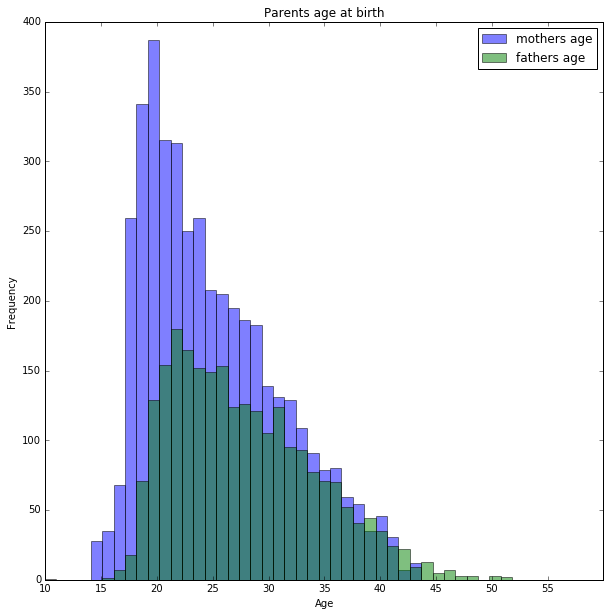

In [5]:
# Let's read the cm1age and cf1age features from the data into the variables mom_age and dad_age
mom_age = bg.cm1age;
dad_age = bg.cf1age;
# We want to remove entries that contain no information, that is, we want to impute the NaN (not a number) entries
mom_age = mom_age[~np.isnan(mom_age)];
dad_age = dad_age[~np.isnan(dad_age)];
# Before we plot the histograms, let's check the age range in mom_age and dad_age to figure out what is a reasonable
# width for the bins and how many bins we should use
print('Oldest father: {0}; Youngest father: {1}; Father''s Age Range: {2}'.format(max(dad_age),min(dad_age),max(dad_age)-min(dad_age)))
print('Oldest mother: {0}; Youngest mother: {1}; Mother''s Age Range: {2}'.format(max(mom_age),min(mom_age),max(mom_age)-min(mom_age)))
# Based on the results, we don't need any bins below 10 years old and no bins above 60 years old. 
# We will set the bins width to one year to get a good resolution of the data. We use
# the numpy linspace function to create an array of 50 evenly spaced numbers (representing the bins) between 10 and 50.
bins = np.linspace(10, 60, 50)
# Let's create the matplotlib figure where we will plots the histograms.
fig = plt.figure(figsize=(10,10))
# Plot the histograms. We use pyplot's hist function and provide and set the opacity of the plot to 0.5 through the alpha argument.
plt.hist(mom_age, bins, alpha=0.5, label='mother''s age')
plt.hist(dad_age, bins, alpha=0.5, label='father''s age')
# Label the plot.
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Parent''s age at birth')
# To make the plot look nicer, we set x-tick marks every 5 years. 
plt.xticks(np.arange(10, 60, 5.0))
# Plot a legend so that we can match the color of the histogram to the data.
plt.legend(loc='upper right')
# Show the plot
plt.show()

### Scatter Plots

In this cell we will learn how to use scatter plots. Scatter plots are graphs in which the values of two variables are 
plotted along two axes, the pattern of the resulting points revealing any correlation present.
We will use mother's age and father's age when the child was born to make a scatter plot that will yield information 
about the age difference of the parents.

As before, we will use the features cm1age and cf1age from the data.

ValueError: x and y must be the same size

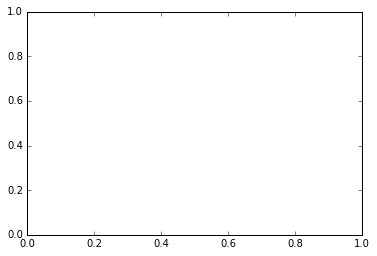

In [7]:
# We could try and use the mom_age and dad_age arrays we created for the histogram
# to create a scatter plot using the pyplot scatter function

plt.scatter(mom_age,dad_age)

# If you run this cell you should find that this doesn't work. Looking at the error, we see that it fails to create the
# scatter plot because the mom_age and dad_age arrays do not have the same number of entries. Why is this? Discuss with 
# the rest of your group. If you have figure it out, or if you give up (don't!), move to the next cell.

# Tip: comment the code that has is producing the error and re-run the cell in order to clean the cell's output.


The reason why we couldn't plot mom_age vs dad_age was because when we removed the NaN entries in each array
we didn't check whether the same rows were removed in both arrays. In order to plot couples, we need to make
sure that when we remove a row, we remove a row in both the mother's and the father's age arrays.
This means that we have to remove all rows for which either the mother's or the father's age is NaN.

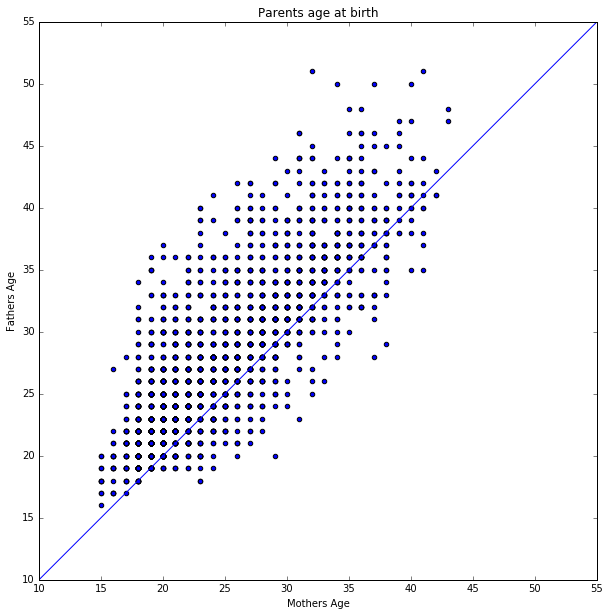

In [10]:
# Let's find all the rows that are not NaN for cm1age and cf1age.
dad_age_notnan = ~np.isnan(bg.cf1age)
mom_age_notnan = ~np.isnan(bg.cm1age)
# Now, dad_age_notnan and mom_age_notnan have entries that are either 1 (if that row is not a NaN) or 0 (if the row is NaN). 
# We use the logic AND function (i.e., &) to get an array with entries that are 1 only if the row is not NaN for both
# the mother's and the father's age.
momdad_age_notnan = mom_age_notnan & dad_age_notnan
# Now, we can redefine the vectors mom_age and dad_age as the rows of cm1age and cf1age that have an entry equal .
# to 1 in momdad_notnan
mom_age = bg.cm1age[momdad_age_notnan];
dad_age = bg.cf1age[momdad_age_notnan];
# Create a scatter plot where the x-axis represents the father's age and the y-axis represents the mother's age.
fig = plt.figure(figsize=(10,10))
plt.scatter(mom_age,dad_age)
# We add a line along the diagonal which will split the plot into two regions. Points above the diagonal represent
# couples with the father older than the mother, while points below the diagonal represent couples with the
# father younger than the mother. Lines exactly on the diagonal represent couples with the father and mother being 
# the same age. 
plt.plot([10,55],[10,55])
# We set the x-axes and y-axes to be between 10 and 55 according to the range of the data. 
plt.xlim(10,55)
plt.ylim(10,55)
# Label the scatter plot
plt.xlabel('Mother''s Age')
plt.ylabel('Father''s Age')
plt.title('Parent''s age at birth')

### Combining Histograms and Scatter Plots

As we saw above, we can use histograms and scatter plots to represent continuous variables. Both the histogram and the scatter
plot contain the same information, but certain properties (e.g. couples) are easier to observe in one plot versus the other. 

We can also combine the histogram and the scatter plot to visualize data in a more information dense plot. The cell below shows
and example of how to do this. The code below is a bit more complex than what we have seen so far, so feel free to skip this cell if you want to.

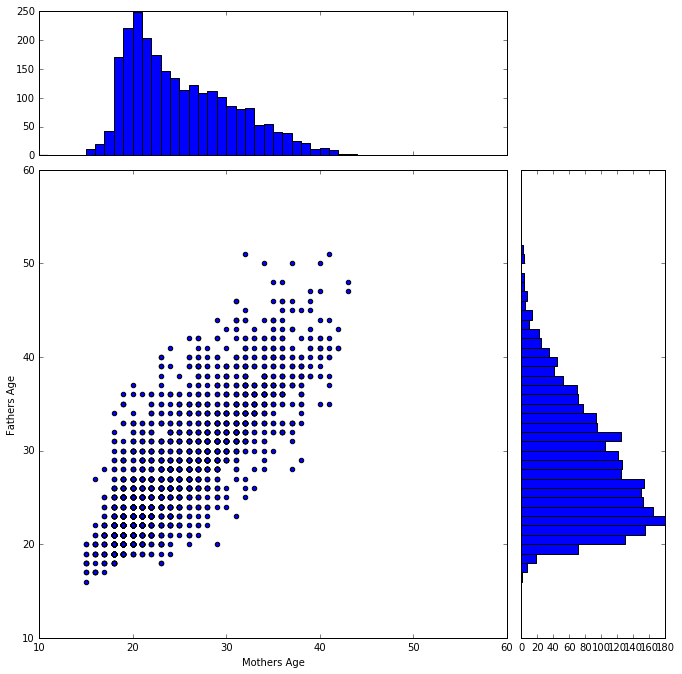

In [18]:
from matplotlib.ticker import NullFormatter

nullfmt = NullFormatter()         # Used to remove labels in plots

# Definitions for the axes.
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02
# Define the rectangles that will contain the scatter plot and the histograms.
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
# Set the font size in the plot to 10
plt.rcParams.update({'font.size': 10})
# Start with a rectangular Figure
plt.figure(1, figsize=(10, 10))
# Create axis for the scatter plot and the two histograms.
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
# remove labels for the histograms to prevent a cluttered look.
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# Plot the scatter plot.
axScatter.scatter(mom_age, dad_age)
axScatter.set_xlim((10, 60))
axScatter.set_ylim((10, 60))
axScatter.set_xlabel('Mother''s Age')
axScatter.set_ylabel('Father''s Age')
# Plot the histograms.
bins = np.arange(10, 60, 1)
axHistx.hist(mom_age, bins=bins)
axHisty.hist(dad_age, bins=bins, orientation='horizontal')
# Align histograms with scatter plot.
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
# Show plot.
plt.show()

## Visualizing Categorical (Discrete) Variables

### Pie Charts

You have probably seen and used pie charts before. They are great for visualizing proportions. Below we use a pie chart to
visualize the level of education of the parents when the child was born. 

These are categorical variables, meaning that the variable can take on one of a limited, and usually fixed number of possible values, assigning each entry in the data to a particular group.

We use the cm1edu and cf1edu features from the data which contain encoded information about the level of education of the parents when the child was born. The entries in cf1edu and cm1edu are either 1,2,3 or 4:

1: 'Less than High School',

2: 'High School or equivalent',

3: 'Some college or technical degree',

4: 'college or graduate degree'

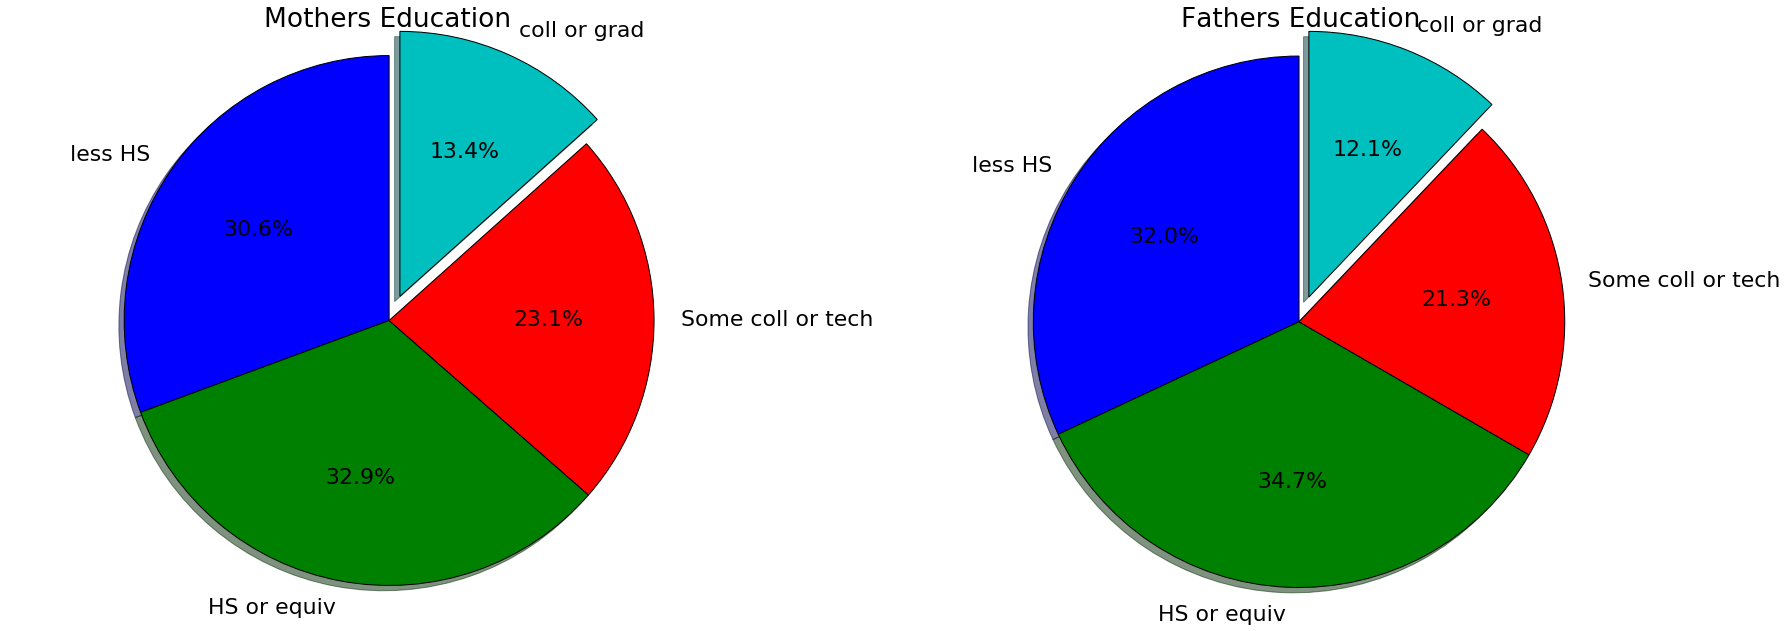

In [27]:
# Parents educational level at birth
mom_edu = bg.cm1edu[momdad_age_notnan]; # level of education of mother at birth
dad_edu = bg.cf1edu[momdad_age_notnan]; # level of education of father at birth
#  How many in each category? Use the len function to obtain the length of an array.
mom_edu_1 = len(mom_edu[mom_edu==1])
mom_edu_2 = len(mom_edu[mom_edu==2])
mom_edu_3 = len(mom_edu[mom_edu==3])
mom_edu_4 = len(mom_edu[mom_edu==4])

dad_edu_1 = len(dad_edu[dad_edu==1])
dad_edu_2 = len(dad_edu[dad_edu==2])
dad_edu_3 = len(dad_edu[dad_edu==3])
dad_edu_4 = len(dad_edu[dad_edu==4])

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'less HS','HS or equiv','Some coll or tech','coll or grad' 
mom_sizes = [mom_edu_1, mom_edu_2, mom_edu_3, mom_edu_4]
dad_sizes = [dad_edu_1, dad_edu_2, dad_edu_3, dad_edu_4]
# We can also pass an array called "explode" which determines how much we want to highlight one of the pie slices.
explode = (0, 0, 0, 0.1)  # only "explode" the 4th slice (i.e. 'College or Graduate Degree')
# Set the plot font size to 22
plt.rcParams.update({'font.size': 22})
# We will create a pie chart for the mother and one for the father, but we will place both pie charts on the same figure.
fig = plt.figure(figsize=(30,10))
# To do this, we make use of subplots. Subplots partition the figure into multiple plots. 
ax1 = plt.subplot(121) # 121 means we want 1 row, 2 columns, and that we want to plot on the first of these 2 subplots
plt.title('Mother''s Education')
ax1.pie(mom_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2 = plt.subplot(122) # 122 means we want the 2nd plot of the 1 row, 2 columns figure.
plt.title('Father''s Education')
ax2.pie(dad_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Bar Plots

Another great way to visualize categorical variables is to use bar plots. Below, we plot the level of education of the parents when the child was born on a bar plot together with whether they were married or not. To do this, we use the feature cf1marm, which is a binary variable representing whether the couple was married or not at the time the child was born.

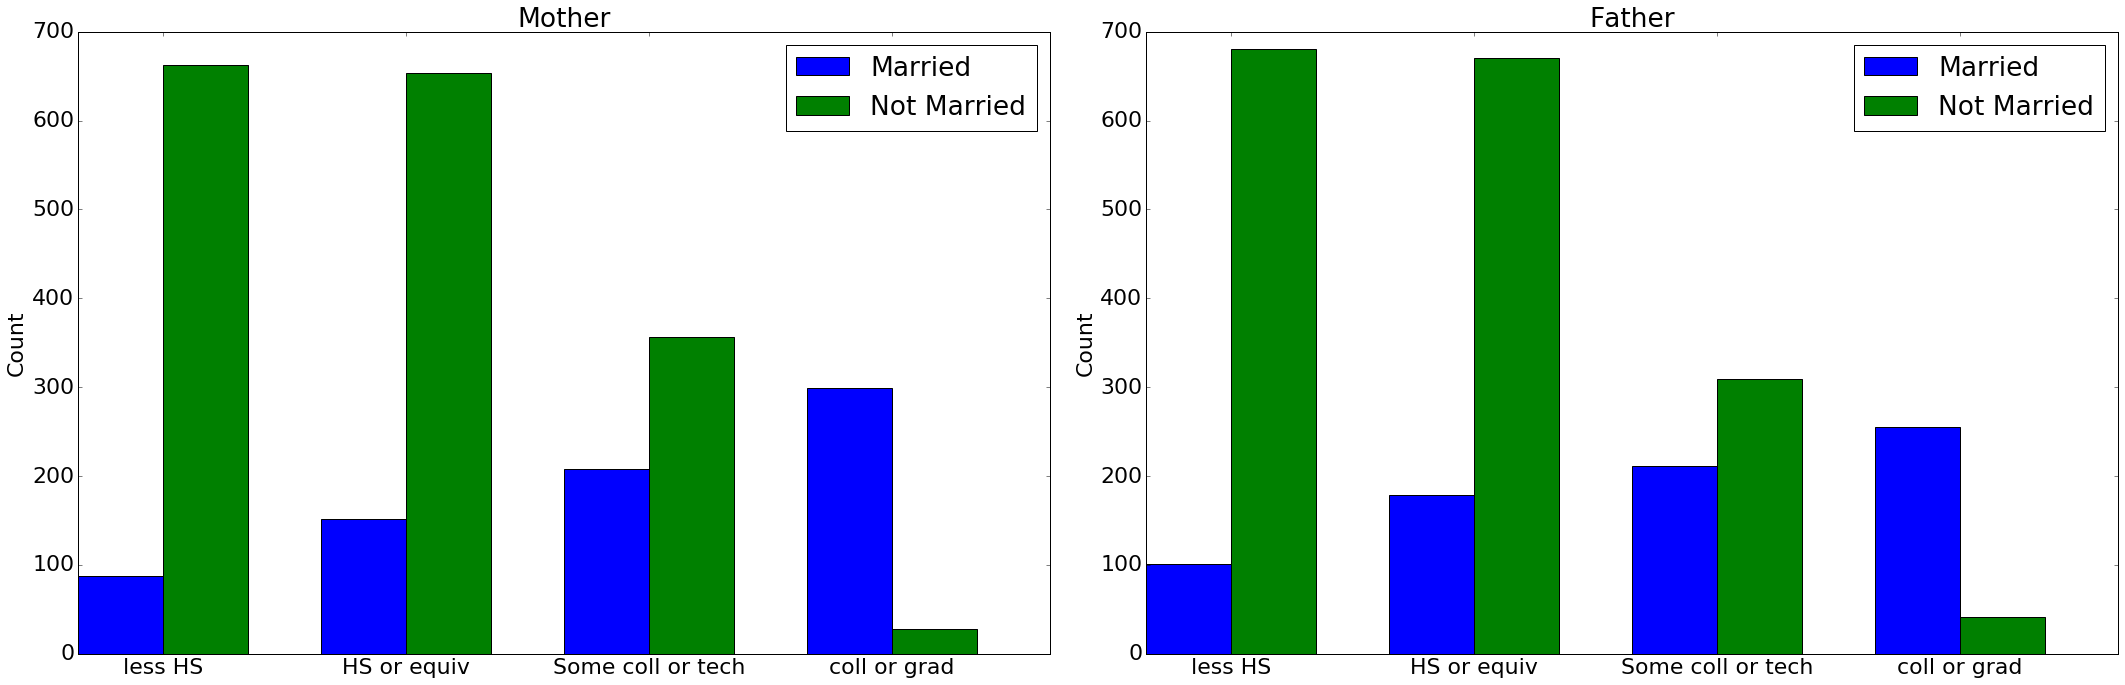

In [43]:
# Impute NaN entries in cf1marm
married = bg.cf1marm[momdad_age_notnan]
# How many moms are married in each of the 4 education level groups? 
# Here we make use of a for loop to check how many married and non married moms there are with each of the 4 levels of 
# education.

# First we initialize the mom_married_count and mom_not_married_count to empty lists
mom_married_count = []
mom_not_married_count = []
# For each education level:
for eduLevel in range(1,5):
    # Get array of married moms with current education level
    mom_married_with_eduLevel = married[mom_edu==eduLevel]
    # Count how many of them are married and how many are not married
    count_true =  len(mom_married_with_eduLevel[mom_married_with_eduLevel==1])
    count_false = len(mom_married_with_eduLevel[mom_married_with_eduLevel==0])
    # Update count arrays
    mom_married_count.append(count_true)
    mom_not_married_count.append(count_false)
    
# And we do the same for the father
dad_married_count = []
dad_not_married_count = []
# For each education level:
for eduLevel in range(1,5):
    # Get array of married moms with current education level
    dad_married_with_eduLevel = married[dad_edu==eduLevel]
    # Count how many of them are married and how many are not married
    count_true =  len(dad_married_with_eduLevel[dad_married_with_eduLevel==1])
    count_false = len(dad_married_with_eduLevel[dad_married_with_eduLevel==0])
    # Update count arrays
    dad_married_count.append(count_true)
    dad_not_married_count.append(count_false)

# We need to define the position of the bars. Since we have 4 levels of education, we will set the position of the
# bars to be at 1 2 3 and 4 on the x-axes. To make the two bars (one for married and one for not married) fit nicely,
# we set the width of the bars to 0.35
bar_pos = np.arange(4)
bar_width = 0.35
 
# create plot
fig = plt.figure(figsize=(30,10))
# subplot for mother
ax1 = plt.subplot(121)
rects1 = ax1.bar(bar_pos, mom_married_count, bar_width, color='b', label='Married') 
rects2 = ax1.bar(bar_pos + bar_width, mom_not_married_count, bar_width,color='g', label='Not Married') 
ax1.set_ylabel('Count')
plt.title('Mother')
# set the level of education as the x-ticks
plt.xticks(bar_pos + bar_width, labels)
plt.legend()
plt.tight_layout()
# subplot for father
ax2 = plt.subplot(122)
rects1 = ax2.bar(bar_pos, dad_married_count, bar_width, color='b', label='Married') 
rects2 = ax2.bar(bar_pos + bar_width, dad_not_married_count, bar_width,color='g', label='Not Married') 
ax2.set_ylabel('Count')
plt.title('Father')
# set the level of education as the x-ticks
plt.xticks(bar_pos + bar_width, labels)
plt.legend()
plt.tight_layout()

plt.show()

## Visualizing Continuous and Categorical Variables Simoultaneously

### Scatter Plot With Group Colors and Group Markers Based on Discrete Variables

What makes scatter plots great to visualize data is that we can use the color, marker type, and color of the points in the plot
to increase the amount of information present in the plot. For example, we can color code the points in a scatter plot according to a discrete variable.

Below, we color the points in the parent's age scatter plot to see if the parents were married at the time the child was born.

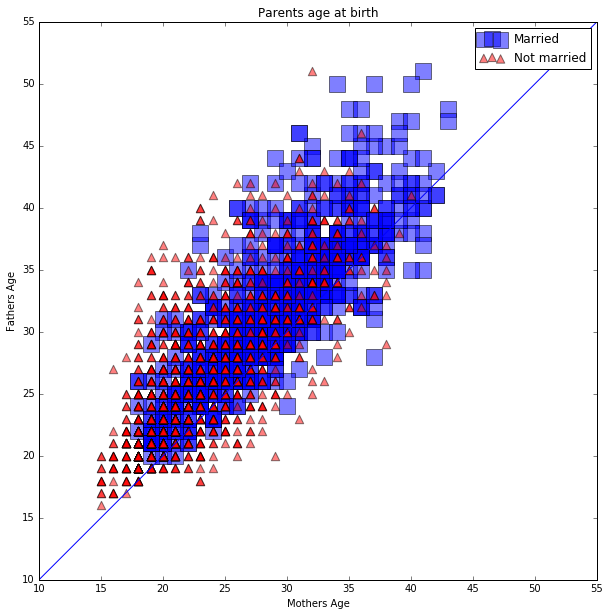

In [21]:
# We will color points according to whether the couple was married or not. To do this, we neet to obtain the indices 
# of married array corresponding to the entries that are 1 (true) and 0 (false). 
married_yes = married[married==True].index.values
married_no = married[married==False].index.values
# Create new arrays for married and not married couples
mom_age_married = mom_age[married_yes]
mom_age_not_married = mom_age[married_no]
dad_age_married = dad_age[married_yes]
dad_age_not_married = dad_age[married_no]
# We will create a plot with different color, marker, and size for married and not married couples by providing more
# arguments to the pyplot scatter function. The argument c is used to define the colors of the points, s to define the
# size, and marker for the type of marker. 
fig = plt.figure(figsize=(10,10))
plt.scatter(mom_age_married,dad_age_married,c='b',s=240, marker='s',alpha=0.5,label='Married')
plt.scatter(mom_age_not_married,dad_age_not_married,c='r',s=70,marker='^',alpha=0.5,label='Not married')
plt.legend()
plt.plot([10,55],[10,55])
plt.xlim(10,55)
plt.ylim(10,55)
plt.xlabel('Mother''s Age')
plt.ylabel('Father''s Age')
plt.title('Parent''s age at birth')

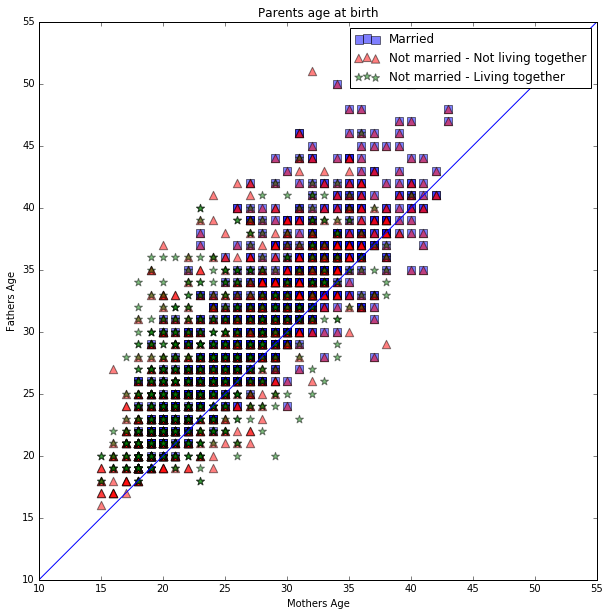

In [22]:
# EXERCISE: make a scatter plot like the one above, but make the points corresponding to couples who are not married
# but living together (cohabiting) be green stars.

# Tip: Remember to remove the same rows that we removed NaNs from cm1age and cf1age for any new feature that you want to use.

# SOLUTION:
# To do this, we can use the binary feature cf1cohm or cm1cohm with removed nan entries.
coh = bg.cf1cohm[momdad_age_notnan]
# Get indices of true and false entries 
coh_yes = coh[coh==True].index.values
coh_no = coh[coh==False].index.values
# Create new vectors for cohabiting and not cohabiting parents
mom_age_coh_yes = mom_age[coh_yes]
mom_age_coh_no = mom_age[coh_no]
dad_age_coh_yes = dad_age[coh_yes]
dad_age_coh_no = dad_age[coh_no]
# Create plot
fig = plt.figure(figsize=(10,10))
# plot married couples
plt.scatter(mom_age_married,dad_age_married,c='b',s=70, marker='s',alpha=0.5,label='Married')
# plot not married couples that do not live together
plt.scatter(mom_age_coh_no,dad_age_coh_no,c='r',s=70, marker='^',alpha=0.5,label='Not married - Not living together')
# plot not married couples that live together
plt.scatter(mom_age_coh_yes,dad_age_coh_yes,c='g',s=70,marker='*',alpha=0.5,label='Not married - Living together')
plt.legend()
plt.plot([10,55],[10,55])
plt.xlim(10,55)
plt.ylim(10,55)
plt.xlabel('Mother''s Age')
plt.ylabel('Father''s Age')
plt.title('Parent''s age at birth')

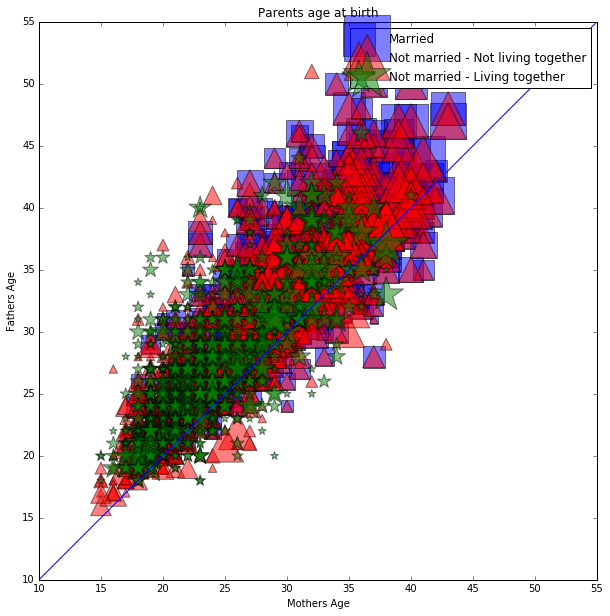

In [23]:
# EXERCISE: make the size of markers in the previous plot reflect for how many years the mother knew the father
# before getting pregnant.  

# SOLUTION:
# To do this, we can use the feature m1b1a or cm1cohm with removed nan entries
years_known = bg.m1b1a[momdad_age_notnan]
# Create new vectors for cohabiting and not cohabiting parents
y_married = years_known[married_yes]
y_coh_yes =  years_known[coh_yes]
y_coh_no =  years_known[coh_no]
# Create plot
fig = plt.figure(figsize=(10,10))
# plot married couples
plt.scatter(mom_age_married,dad_age_married,c='b',s=70*y_married, marker='s',alpha=0.5,label='Married')
# plot not married couples that do not live together
plt.scatter(mom_age_coh_no,dad_age_coh_no,c='r',s=70*y_coh_no, marker='^',alpha=0.5,label='Not married - Not living together')
# plot not married couples that live together
plt.scatter(mom_age_coh_yes,dad_age_coh_yes,c='g',s=70*y_coh_yes,marker='*',alpha=0.5,label='Not married - Living together')
plt.legend()
plt.plot([10,55],[10,55])
plt.xlim(10,55)
plt.ylim(10,55)
plt.xlabel('Mother''s Age')
plt.ylabel('Father''s Age')
plt.title('Parent''s age at birth')